In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

In [2]:
columns = ['variance','skewness','curtosis','entropy','class']

In [3]:
df = pd.read_csv(r"C:\Users\krunal sheth\Downloads\data_banknote_authentication.txt",header = None,names = columns )
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [5]:
df.duplicated().sum()

24

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.duplicated().sum()

0

In [8]:
df['class'].unique()

array([0, 1], dtype=int64)

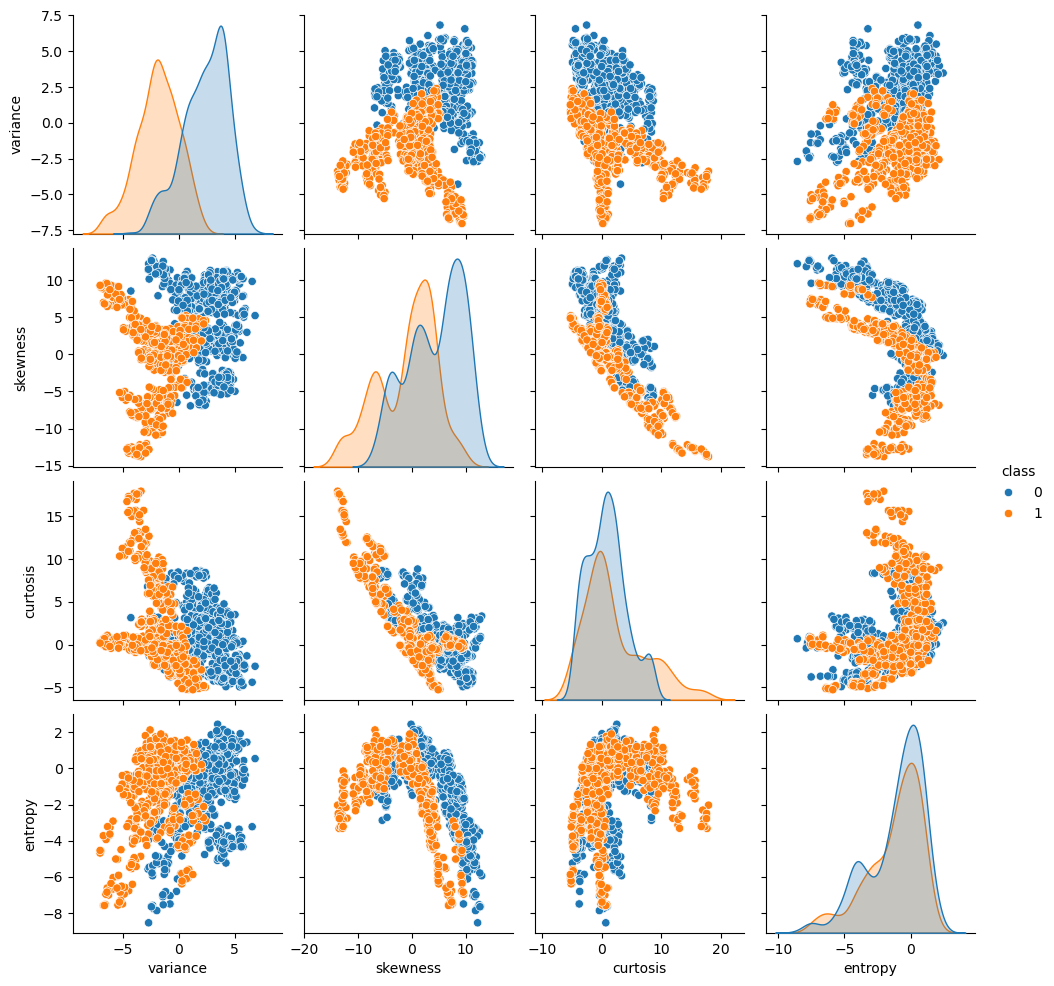

In [9]:
sns.pairplot(data = df,hue = 'class')
plt.show()

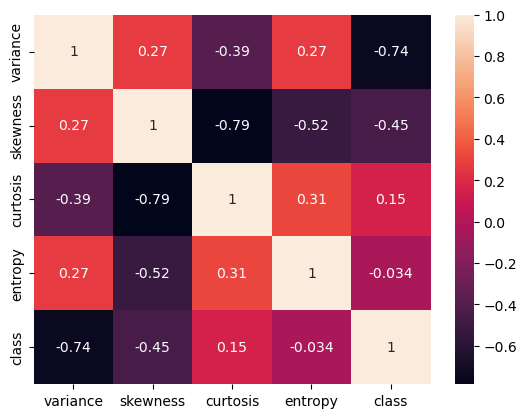

In [10]:
sns.heatmap(df.corr(),annot = True)
plt.show()

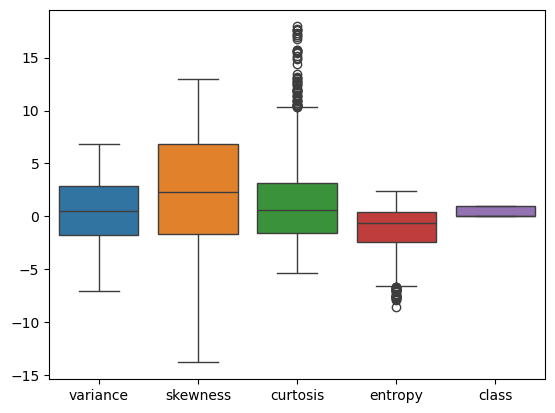

In [11]:
sns.boxplot(data = df)
plt.show()

In [12]:
y = df['class']
x = df.iloc[:,:-1]

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
forest = RandomForestClassifier()

In [16]:
forest.fit(x_train,y_train)

RandomForestClassifier()

# prediction

In [17]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [18]:
forest.predict([[3.45660,9.5228,-4.0112,-3.59440]])

C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [19]:
forest.score(x_train,y_train)

1.0

In [20]:
forest.score(x_test,y_test)

0.9827160493827161

In [21]:
y_pred = forest.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.9827160493827161

# confusion matrix

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

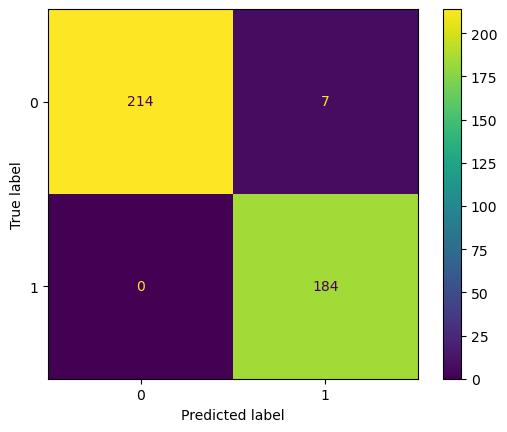

In [24]:
ConfusionMatrixDisplay.from_estimator(forest, x_test, y_test)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       221
           1       0.96      1.00      0.98       184

    accuracy                           0.98       405
   macro avg       0.98      0.98      0.98       405
weighted avg       0.98      0.98      0.98       405



In [26]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [27]:
def plot_multiclass_roc(clf, x_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.predict_proba(x_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="lower right",fontsize=8)
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

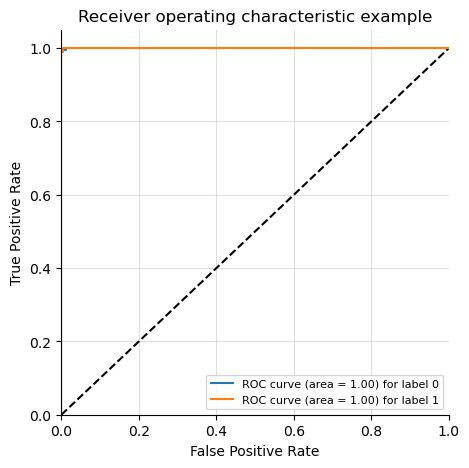

In [28]:
plot_multiclass_roc(forest, x_test, y_test, n_classes = 2)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [36]:
n_estimators = [64,100,125,200]
max_features = [2,3,4]
bootstrap = [True, False]
oob_score = [True, False]

In [41]:
param_grid = {'n_estimators': n_estimators,'max_features': max_features,'bootstrap': bootstrap,'oob_score':oob_score}

In [42]:
forest_model = RandomForestClassifier()

In [43]:
grid_model = GridSearchCV(forest_model,param_grid)

In [44]:
grid_model.fit(x_train,y_train)

C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 450,

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 125, 200],
                         'oob_score': [True, False]})

In [45]:
grid_model.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 200, 'oob_score': False}

In [46]:
predictions = grid_model.predict(x_test)

In [51]:
rfc = RandomForestClassifier(max_features = 2,n_estimators = 200,oob_score = True )

In [52]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=200, oob_score=True)

In [53]:
rfc.oob_score_

0.9936373276776246

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       221
           1       0.97      1.00      0.98       184

    accuracy                           0.99       405
   macro avg       0.98      0.99      0.99       405
weighted avg       0.99      0.99      0.99       405



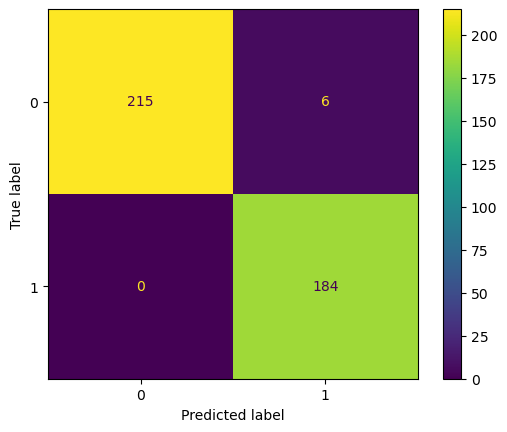

In [58]:
ConfusionMatrixDisplay.from_estimator(grid_model, x_test, y_test)

In [60]:
predictions 

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [62]:
np.sum(y_pred != predictions )

1

In [71]:
from sklearn.metrics import accuracy_score
errors = []
misclassifications = []

for n in range(1,500):
    rfc = RandomForestClassifier(max_features = 2,n_estimators = n)
    rfc.fit(x_train,y_train)
    y_pred = rfc.predict(x_test)
    error = 1- accuracy_score(y_test,y_pred)
    n_missed = np.sum(y_pred != y_test)
    errors.append(error)
    misclassifications.append(n_missed)

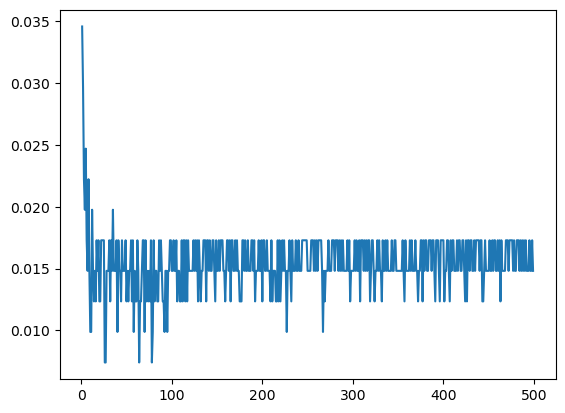

In [72]:
plt.plot(range(1,500),errors)

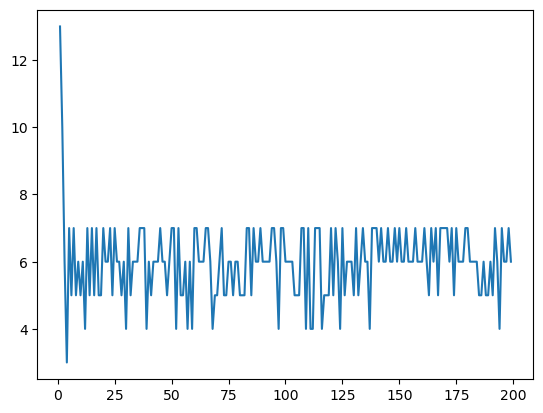

In [68]:
plt.plot(range(1,200),misclassifications)